In [1]:
import numpy as np
import pandas as pd

from scipy import stats
from statistics import NormalDist

from sklearn.preprocessing import scale
import math
import random

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Define the minimum and maximum values for probability of event
MIN = .07
MAX = .17
# Define the number of trials
NUM_SAMPLES = 1000
# Define the log loss mean and standard deviation
LOG_MEAN = 12.55
LOG_STD = 3.06

In [4]:
# Initialize lists to store trial results
trial_results = []

In [5]:
# Ensure we always get the same numbers
# random.seed(42)

In [6]:
# Generate random numbers for each trial
for trial in range(NUM_SAMPLES):
    # Generate a random number between MIN and MAX, not assuming any underlying distribution 
    random_number = MIN + (MAX-MIN) * random.random()
    trial_results.append(random_number)

In [7]:
# Create a DataFrame to store the trial results
data = {'Frequency': np.arange(1, NUM_SAMPLES + 1), 'Probability_of_event': trial_results}
df = pd.DataFrame(data)

In [8]:
# Display the results
df

,Frequency,Probability_of_event
0,1,0.130320
1,2,0.140871
2,3,0.143477
3,4,0.074064
4,5,0.114596
...,...,...
995,996,0.076326
996,997,0.136447
997,998,0.131810
998,999,0.152610


In [9]:
# Each of the probabilities may lead to a simulated event
df['Simulated_event'] = df['Probability_of_event'].apply(lambda x : int(round(random.random() < x)))

In [10]:
# Display the results
df

,Frequency,Probability_of_event,Simulated_event
0,1,0.130320,0
1,2,0.140871,0
2,3,0.143477,0
3,4,0.074064,0
4,5,0.114596,1
...,...,...,...
995,996,0.076326,0
996,997,0.136447,0
997,998,0.131810,0
998,999,0.152610,1


In [11]:
res = NormalDist(mu=LOG_MEAN, sigma=LOG_STD).inv_cdf(random.uniform(0, 1))

In [12]:
# Losses are log-normally distributed, around given mean and standard deviation
dist = []
for i in range(NUM_SAMPLES):
    res = NormalDist(mu=LOG_MEAN, sigma=LOG_STD).inv_cdf(random.uniform(0, 1))
    dist.append(res)

In [13]:
df['Possible_loss'] = pd.Series(dist, index=df.index)

In [14]:
# Display the results
df

,Frequency,Probability_of_event,Simulated_event,Possible_loss
0,1,0.130320,0,14.302710
1,2,0.140871,0,12.878374
2,3,0.143477,0,11.426582
3,4,0.074064,0,11.344529
4,5,0.114596,1,14.141342
...,...,...,...,...
995,996,0.076326,0,12.951273
996,997,0.136447,0,12.585202
997,998,0.131810,0,9.216615
998,999,0.152610,1,10.253361


In [15]:
df['Simulated_loss'] = df['Simulated_event'] * df['Possible_loss']

In [16]:
def logarithmbase10(x):
    try:
        return math.log10(x)
    except:
        return 0.0001

In [17]:
df['Log_simulated_loss'] = df['Simulated_loss'].apply(lambda x : logarithmbase10(x))

In [18]:
# Display the results
df

,Frequency,Probability_of_event,Simulated_event,Possible_loss,Simulated_loss,Log_simulated_loss
0,1,0.130320,0,14.302710,0.000000,0.000100
1,2,0.140871,0,12.878374,0.000000,0.000100
2,3,0.143477,0,11.426582,0.000000,0.000100
3,4,0.074064,0,11.344529,0.000000,0.000100
4,5,0.114596,1,14.141342,14.141342,1.150491
...,...,...,...,...,...,...
995,996,0.076326,0,12.951273,0.000000,0.000100
996,997,0.136447,0,12.585202,0.000000,0.000100
997,998,0.131810,0,9.216615,0.000000,0.000100
998,999,0.152610,1,10.253361,10.253361,1.010866


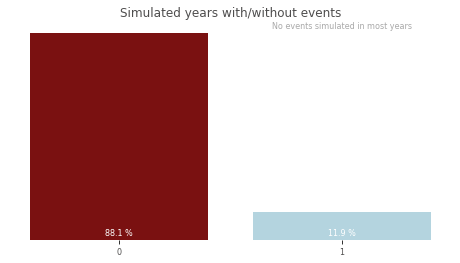

In [24]:
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(data = df, x = df['Simulated_event'].value_counts().keys(), y = df['Simulated_event'].value_counts()/len(df)*100, 
            palette=['darkred', 'lightblue'])
plt.xlabel('')
plt.ylabel('')
plt.title('Simulated years with/without events', size=12, color='#4f4e4e')
plt.xticks(size=8, color='#4f4e4e')
plt.yticks([], [])
plt.text(x=1, y=90, s='No events simulated in most years', 
                 color='darkgrey', fontsize=8, horizontalalignment='center')
plt.text(x=0, y=2, s=" ".join([(round(df['Simulated_event'].value_counts()[0]/len(df)*100, 2)).astype('str'), "%"]),  
                 color='white', fontsize=8, horizontalalignment='center')
plt.text(x=1, y=2, s=" ".join([(round(df['Simulated_event'].value_counts()[1]/len(df)*100, 2)).astype('str'), "%"]),  
                 color='white', fontsize=8, horizontalalignment='center')
sns.despine(left=True, bottom=True);

In [25]:
actual_losses = [x for x in df['Log_simulated_loss'] if x > 0.0001]

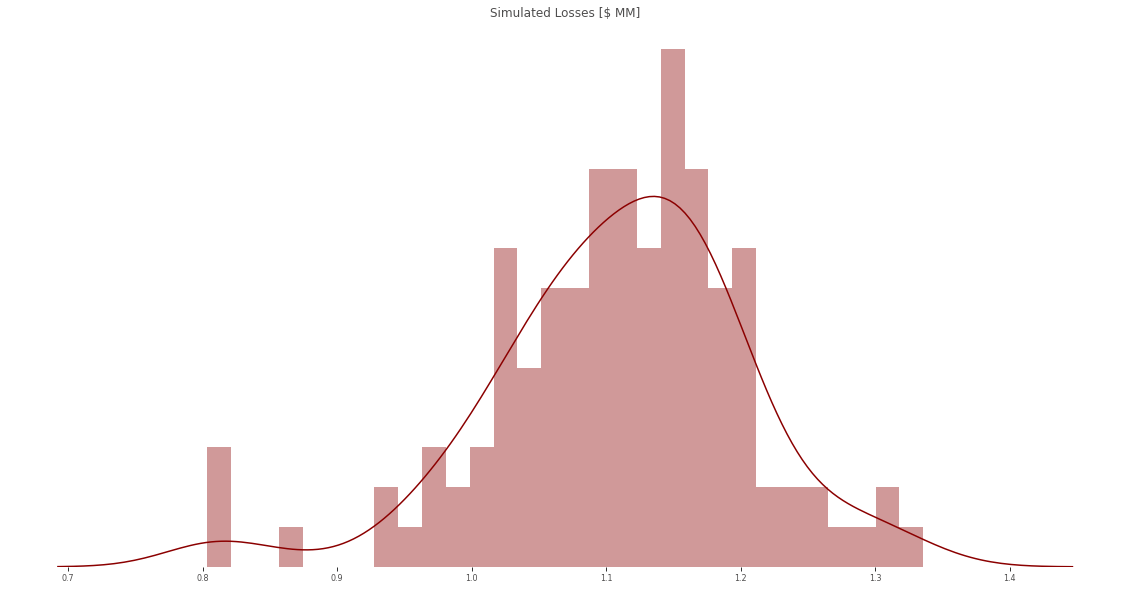

In [27]:
plt.figure(figsize=(20, 10))
sns.distplot(actual_losses, bins=30, color='darkred')
plt.xlabel('')
plt.ylabel('')
plt.title('Simulated Losses [$ MM]', size=12, color='#4f4e4e')
plt.xticks(size=8, color='#4f4e4e')
plt.yticks([], [])
sns.despine(left=True, bottom=True);

In [22]:
# plt.figure(figsize=(20, 10))
# sns.histplot(df.Log_simulated_loss, bins=30, stat='density', color='darkred')
# sns.kdeplot(df.Log_simulated_loss, fill=True, color='darkred')
# plt.xlabel('Simulated Log Loses [$ MM]')